# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Matthew Clark
- Email: matthewclark965@gmail.com
- Id Dicoding: M891D5Y1083

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid') 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import joblib 
import streamlit as st

# Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
# Load Dataset
try:
    df = pd.read_csv('data.csv', delimiter=';')
except:
    df = pd.read_csv('data.csv', delimiter=',')
# Menampilkan 5 baris pertama
print("Contoh Data ")
display(df.head())


# Cek tipe data, missing values, dan duplikasi
# Cek tipe data
print("\nInfo Dataset")
df.info()

print("\nStatistik Deskriptif")
display(df.describe())

# Cek missing values
print("\nCek Data Kosong")
print(f"Jumlah Missing Values: {df.isnull().sum().sum()}")

# Cek Duplikat
print("\nCek Data Duplikat")
print(f"Jumlah Duplikat: {df.duplicated().sum()}")



Contoh Data 


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate



Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         442

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000



Cek Data Kosong
Jumlah Missing Values: 0

Cek Data Duplikat
Jumlah Duplikat: 0


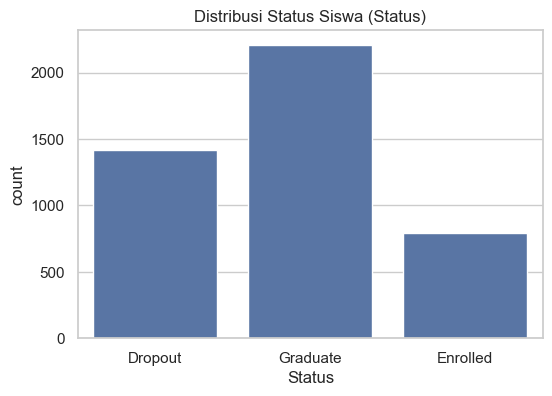

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Status')
plt.title(f'Distribusi Status Siswa ({'Status'})')
plt.show()

# Lihat detail angkanya
print(df['Status'].value_counts())

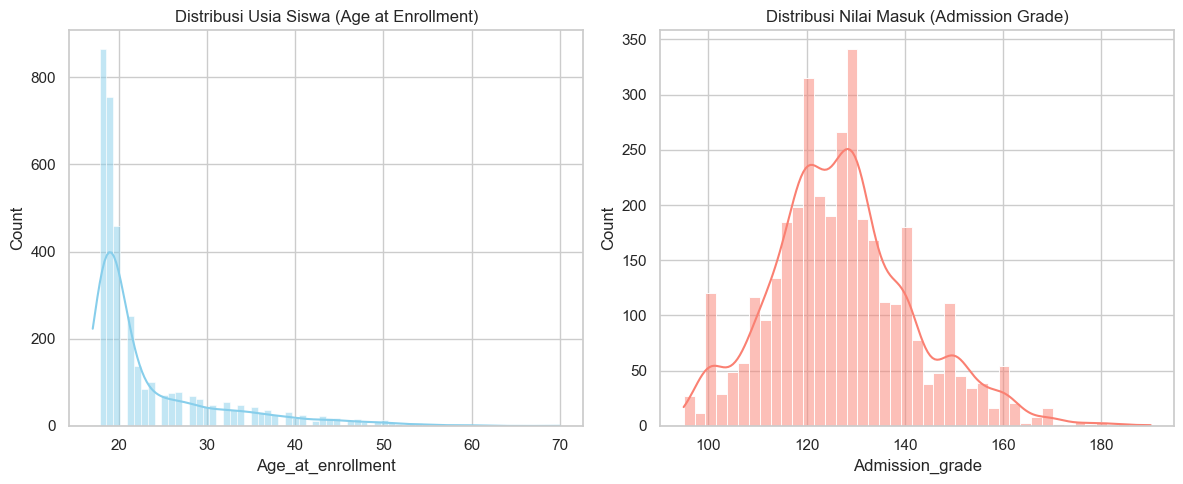

In [4]:
# Univariative
# Gunakan data yang sudah dibuang 'Enrolled'-nya agar fokus
# Pastikan df_clean sudah ada dari langkah sebelumnya
df_clean = df[df['Status'] != 'Enrolled'].copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Distribusi Usia saat Mendaftar
sns.histplot(df_clean['Age_at_enrollment'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Usia Siswa (Age at Enrollment)')

# 2. Distribusi Nilai Masuk (Admission Grade)
sns.histplot(df_clean['Admission_grade'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Nilai Masuk (Admission Grade)')

plt.tight_layout()
plt.show()

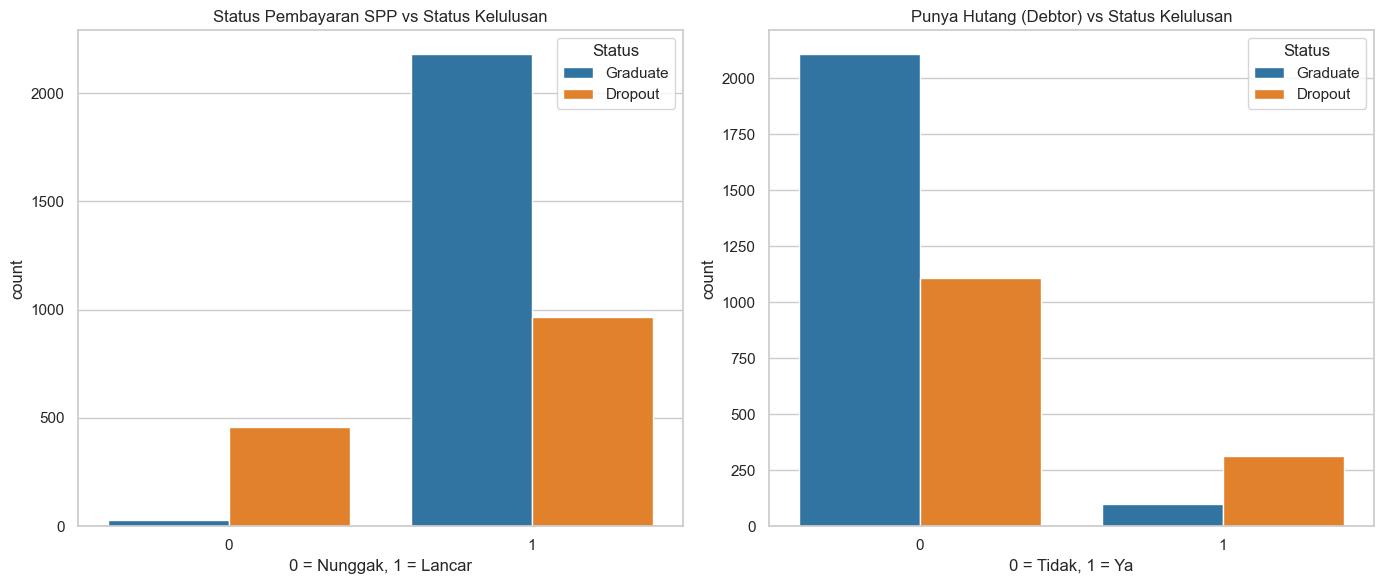

In [ ]:
# Analisis Bivariate
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Kita kunci warnanya di sini
# 'tab:blue' adalah biru standar Seaborn
# 'tab:orange' adalah coklat/orange standar Seaborn
warna_konsisten = {'Graduate': 'tab:blue', 'Dropout': 'tab:orange'}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Uang Kuliah
sns.countplot(
    data=df_clean, 
    x='Tuition_fees_up_to_date', 
    hue='Status', 
    palette=warna_konsisten,  # <--- Pakai palette kustom tadi
    hue_order=['Graduate', 'Dropout'], # Mengatur urutan di Legend
    ax=axes[0]
)
axes[0].set_title('Status Pembayaran SPP vs Status Kelulusan')
axes[0].set_xlabel('0 = Nunggak, 1 = Lancar')

# Plot 2: Hutang (Debtor)
sns.countplot(
    data=df_clean, 
    x='Debtor', 
    hue='Status', 
    palette=warna_konsisten, # <--- Pakai palette kustom yang sama
    hue_order=['Graduate', 'Dropout'], # Mengatur urutan di Legend
    ax=axes[1]
)
axes[1].set_title('Punya Hutang (Debtor) vs Status Kelulusan')
axes[1].set_xlabel('0 = Tidak, 1 = Ya')

plt.tight_layout()
plt.show()

/var/folders/6m/xdy6hnmx6915fmn7_19j7s7h0000gn/T/ipykernel_46974/4032156939.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/6m/xdy6hnmx6915fmn7_19j7s7h0000gn/T/ipykernel_46974/4032156939.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


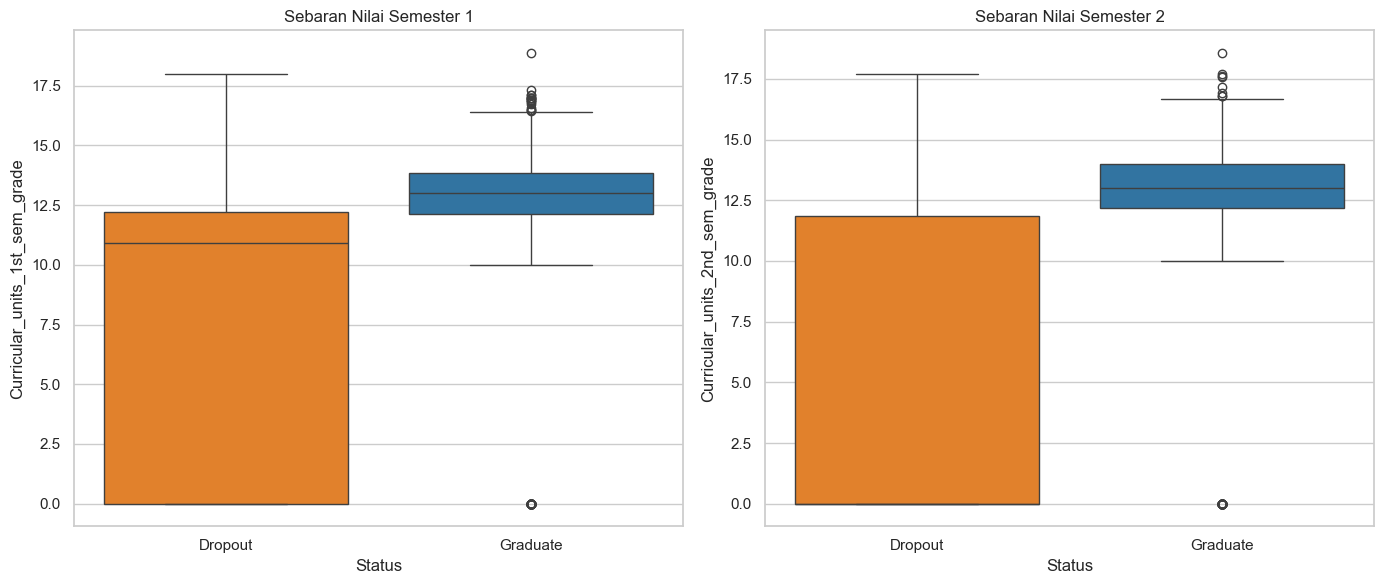

In [ ]:
# Analisis Bivariative - Boxplot Nilai Semester
import matplotlib.pyplot as plt
import seaborn as sns

# Kita kunci warnanya biar konsisten
warna_konsisten = {'Graduate': 'tab:blue', 'Dropout': 'tab:orange'}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Nilai Semester 1
sns.boxplot(
    data=df_clean, 
    x='Status', 
    y='Curricular_units_1st_sem_grade', # <--- Nama kolom yang benar
    palette=warna_konsisten, 
    ax=axes[0]
)
axes[0].set_title('Sebaran Nilai Semester 1')

# Plot 2: Nilai Semester 2
sns.boxplot(
    data=df_clean, 
    x='Status', 
    y='Curricular_units_2nd_sem_grade', # <--- Nama kolom yang benar
    palette=warna_konsisten, 
    ax=axes[1]
)
axes[1].set_title('Sebaran Nilai Semester 2')

plt.tight_layout()
plt.show()

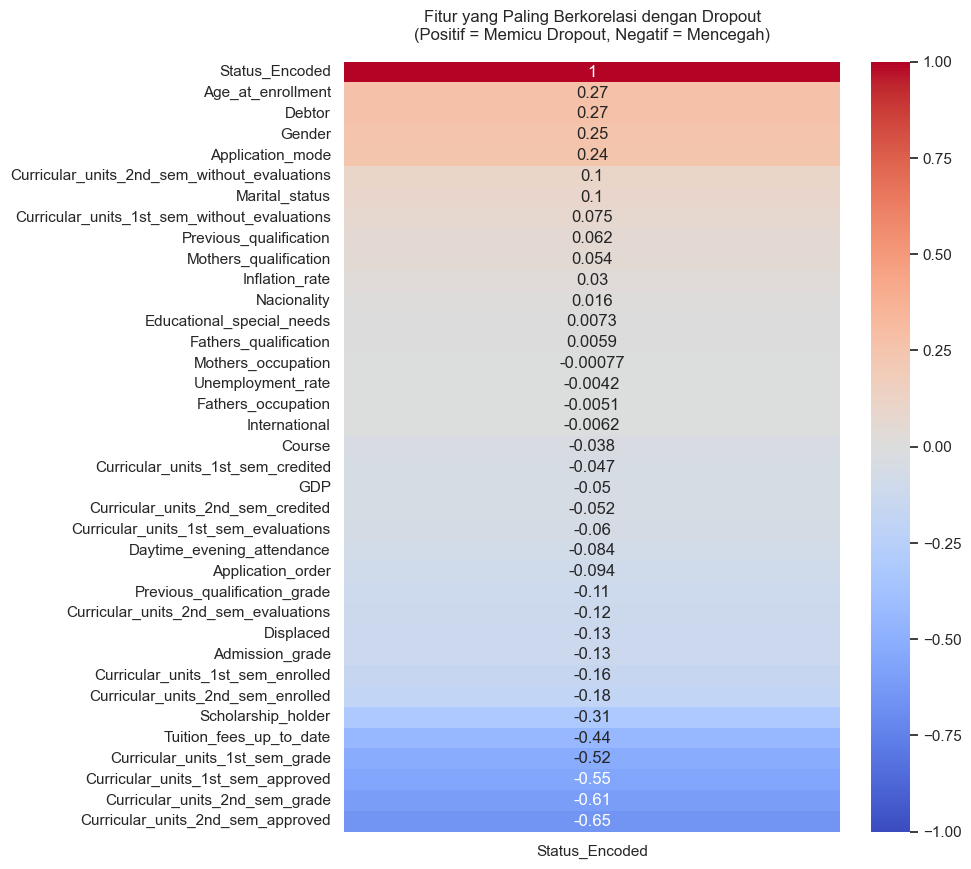

In [12]:
# Analisis Multivariative
# Encoding target dulu supaya bisa dihitung korelasinya
df_clean['Status_Encoded'] = df_clean['Status'].map({'Dropout': 1, 'Graduate': 0})

# Hitung korelasi
corr = df_clean.corr(numeric_only=True)

# Ambil korelasi hanya terhadap target 'Status_Encoded'
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(corr[['Status_Encoded']].sort_values(by='Status_Encoded', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Fitur yang Paling Berkorelasi dengan Dropout\n(Positif = Memicu Dropout, Negatif = Mencegah)', pad=16)
plt.show()

## Data Preparation / Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Memisahkan Fitur (X) dan Target (y)
# Kita buang kolom 'Status' (teks) dan 'Status_Encoded' (target) dari X
X = df_clean.drop(columns=['Status', 'Status_Encoded']) 
y = df_clean['Status_Encoded'] # Target kita (1 = Dropout, 0 = Graduate)

# 2. Membagi Data (Train 80% - Test 20%)
# random_state=42 supaya hasilnya konsisten tiap kali di-run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standarisasi Data (Scaling)
# Mesin lebih suka angka yang range-nya kecil (sekitar -1 sampai 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Jumlah Data Training:", X_train.shape[0])
print("Jumlah Data Testing:", X_test.shape[0])

Jumlah Data Training: 2904
Jumlah Data Testing: 726


## Modeling

In [16]:
from sklearn.linear_model import LogisticRegression

# ==========================================
# MODELING: LOGISTIC REGRESSION
# ==========================================

# 1. Inisialisasi Model
# random_state=42 agar hasil belajarnya konsisten
print("Memulai proses training model...")
model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Melatih Model (Fit)
# Model belajar dari data Training yang sudah di-scaling
model.fit(X_train_scaled, y_train)

# 3. Membuat Prediksi
# Model mencoba menebak data Testing (hasil tebakan disimpan di y_pred)
y_pred = model.predict(X_test_scaled)

print("Modeling selesai! Hasil prediksi sudah disimpan di variabel 'y_pred'.")

Memulai proses training model...
Modeling selesai! Hasil prediksi sudah disimpan di variabel 'y_pred'.


## Evaluation

Akurasi Model: 91.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       449
           1       0.92      0.84      0.88       277

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



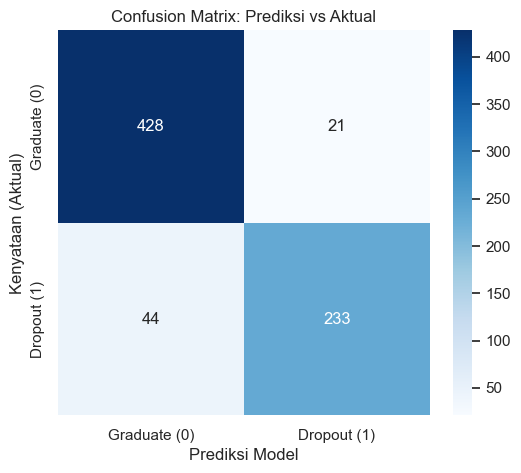

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# EVALUATION: MENILAI PERFORMA MODEL
# ==========================================

# 1. Cek Akurasi Dasar
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc:.2%}")

# 2. Laporan Klasifikasi Lengkap (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Visualisasi Confusion Matrix
# Agar kita tahu berapa banyak siswa yang SALAH diprediksi
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Graduate (0)', 'Dropout (1)'],
            yticklabels=['Graduate (0)', 'Dropout (1)'])
plt.title('Confusion Matrix: Prediksi vs Aktual')
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Aktual)')
plt.show()

In [ ]:
import joblib

# Simpan Model dan Scaler
joblib.dump(model, 'model_dropout.joblib')
joblib.dump(scaler, 'scaler_dropout.joblib')

print("Model dan Scaler berhasil disimpan!")

In [18]:
# ==========================================
# PREDIKSI SISWA "ENROLLED" (Action Items)
# ==========================================
print("--- Memprediksi Nasib Siswa Enrolled ---")

# 1. Ambil data asli yang statusnya 'Enrolled'
# Pastikan 'df' adalah dataframe awal kamu sebelum dibersihkan
df_enrolled = df[df['Status'] == 'Enrolled'].copy()

# 2. Siapkan fiturnya (X)
# Kita harus membuang kolom Target (Status) agar sama dengan data training
# PENTING: Jika saat training kamu membuang kolom lain, di sini juga harus dibuang
X_enrolled = df_enrolled.drop(columns=['Status', 'Status_Encoded'], errors='ignore')

# 3. Lakukan Scaling
# Gunakan scaler yang SUDAH dilatih (jangan fit_transform lagi, tapi transform saja)
X_enrolled_scaled = scaler.transform(X_enrolled)

# 4. Prediksi
# Kita minta model menebak probabilitas (peluang) dropout
# Hasilnya: Kolom 0 = Peluang Lulus, Kolom 1 = Peluang Dropout
probabilitas = model.predict_proba(X_enrolled_scaled)

# Masukkan hasil prediksi ke dataframe biar bisa dibaca
df_enrolled['Peluang_Dropout'] = probabilitas[:, 1]

# 5. Cari Siswa yang BERBAHAYA (Peluang Dropout > 50%)
siswa_berbahaya = df_enrolled[df_enrolled['Peluang_Dropout'] > 0.5].sort_values(by='Peluang_Dropout', ascending=False)

# 6. Tampilkan Hasil
jumlah_bahaya = len(siswa_berbahaya)
total_enrolled = len(df_enrolled)

print(f"\nKESIMPULAN PREDIKSI:")
print(f"Dari total {total_enrolled} siswa yang saat ini Enrolled,")
print(f"Terdapat {jumlah_bahaya} siswa ({jumlah_bahaya/total_enrolled:.1%}) yang diprediksi AKAN DROPOUT.")

print("\n--- Contoh 5 Siswa dengan Risiko Tertinggi ---")
# Menampilkan kolom-kolom penting saja agar mudah dibaca
kolom_penting = ['Peluang_Dropout', 'Tuition_fees_up_to_date', 'Debtor', 'Curricular_units_1st_sem_grade']
display(siswa_berbahaya[kolom_penting].head())

--- Memprediksi Nasib Siswa Enrolled ---

KESIMPULAN PREDIKSI:
Dari total 794 siswa yang saat ini Enrolled,
Terdapat 355 siswa (44.7%) yang diprediksi AKAN DROPOUT.

--- Contoh 5 Siswa dengan Risiko Tertinggi ---


,Peluang_Dropout,Tuition_fees_up_to_date,Debtor,Curricular_units_1st_sem_grade
2239,0.999986,0,1,0.0
3077,0.999974,0,1,0.0
142,0.999957,0,1,0.0
854,0.999956,0,1,0.0
64,0.999367,1,0,0.0
